In [151]:
%reload_ext autoreload

%autoreload 2

from model import *
import functools as ft
import matplotlib.pyplot as plt
from skimage.io import imsave

In [152]:
sess = tf.InteractiveSession()

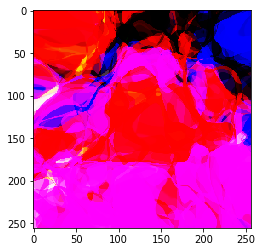

In [220]:
latent_dim = 3
TAXICAB    = ft.partial(np.linalg.norm, axis=0, ord=1)
EUCLIDEAN  = ft.partial(np.linalg.norm, axis=0, ord=2)
INF        = ft.partial(np.linalg.norm, axis=0, ord=np.inf)

norms = [ ]

c = Config( net_size    = 90
          , latent_dim  = latent_dim
          , colours     = 3
          , input_size  = 1 + 1 + len(norms) + latent_dim
          , norms       = norms
          , activations = [ tf.nn.selu, tf.nn.tanh, tf.nn.softplus ] * 2
          )

size   = 256
width  = size
height = size

m = build_model(c)
z = np.random.normal(0, 1, size=c.latent_dim)

sess.run(tf.global_variables_initializer())

yss = forward(sess, c, m, z, width, height)
ys  = stitch_together(yss)

_ = plt.imshow(ys)

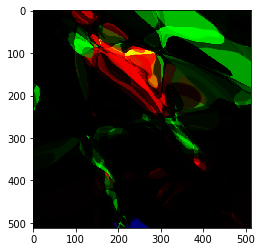

In [217]:
yss = forward(sess, c, m, z, width*2, height*2)
ys  = stitch_together(yss)

_ = plt.imshow(ys)

In [218]:
imsave("maps/night-dancer.png", ys)

/home/noon/tools/miniconda3/envs/cppn-3d/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
